In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

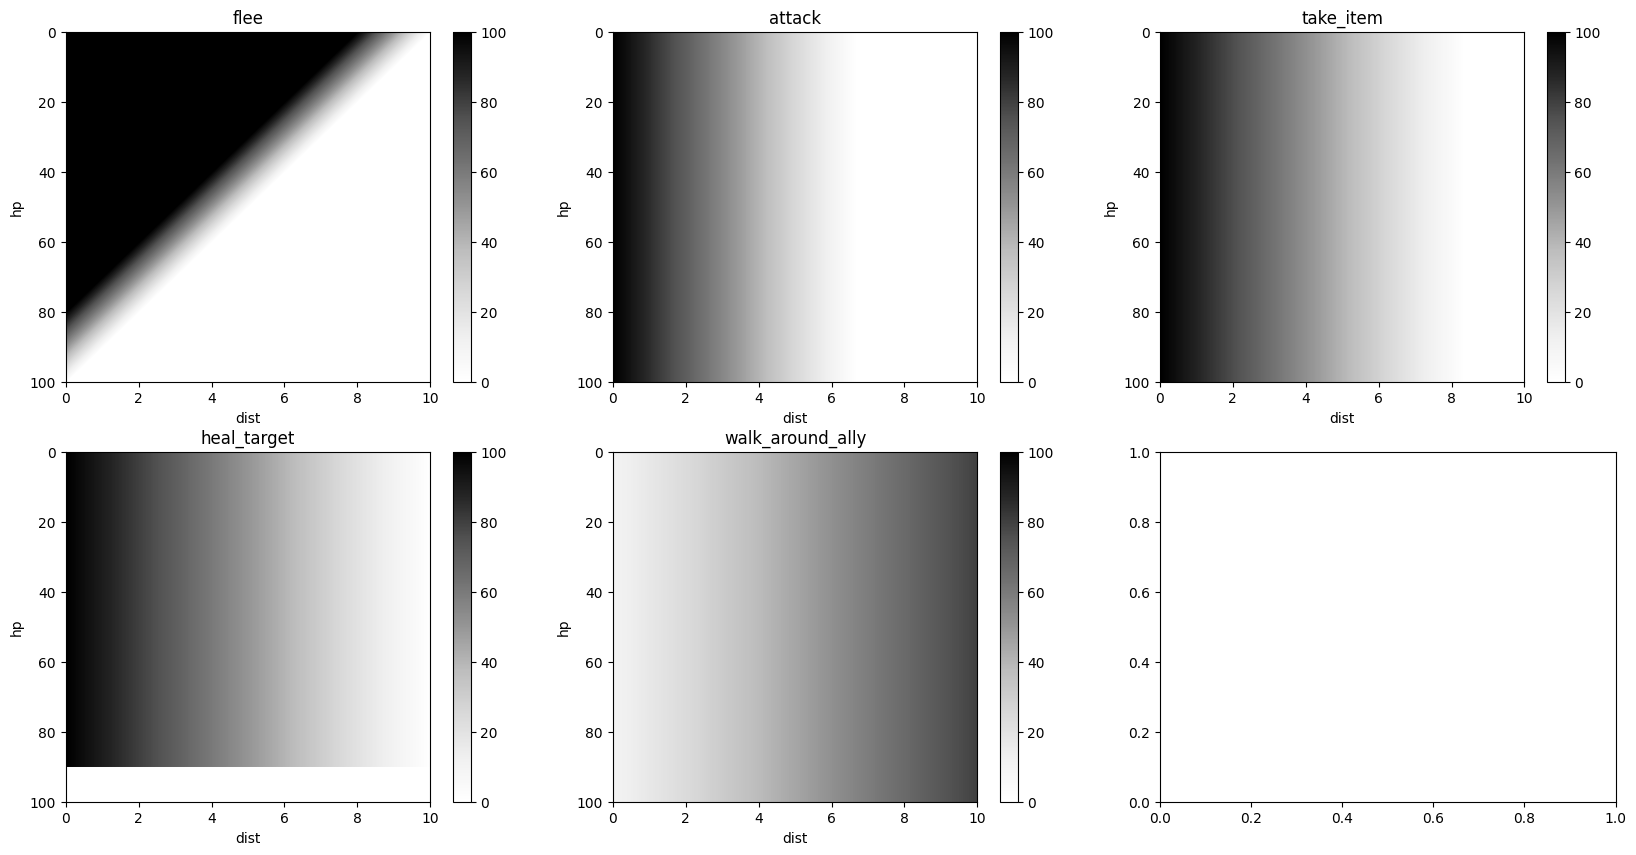

In [ ]:

def flee(hp, dist):
    return (100 - hp) * 5 - 50 * dist

def attack(hp, dist):
    return 100 - 15 * dist

def take_item(hp, dist):
    return 100 - 12 * dist

def heal_target(hp, dist):
    return (hp < 90)  * (100 - 10 * dist)

def walk_around_ally(hp, dist):
    return 7 * dist + 10

HP = np.arange(0, 100, 0.25)
DIST = np.arange(0, 10, 0.025)
img = np.zeros((HP.shape[0], DIST.shape[0]))
ht = np.zeros((5, HP.shape[0], DIST.shape[0]))
# TODO: Vectorize
for x, hp in enumerate(HP):
    for y, ds in enumerate(DIST):
        utility = np.array([flee(hp, ds), attack(hp, ds), take_item(hp, ds), heal_target(hp, ds), walk_around_ally(hp, ds)])
        for i in range(utility.shape[0]):
            ht[i][x][y] = utility[i]
        img[x][y] = np.argmax(utility)

titles = ['flee', 'attack', 'take_item', 'heal_target', 'walk_around_ally']
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i in range(5):
    im = ax[i // 3, i % 3].imshow(ht[i], extent=[0, 10, 100, 0], cmap='Greys', vmin=0, vmax=100)
    ax[i // 3, i % 3].set_aspect('auto')
    ax[i // 3, i % 3].set_xlabel("dist")
    ax[i // 3, i % 3].set_ylabel("hp")
    ax[i // 3, i % 3].set_title(titles[i])
    plt.colorbar(im)